In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
Y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

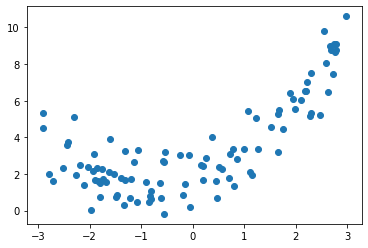

In [5]:
plt.scatter(x, Y)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_predict = lin_reg.predict(X)

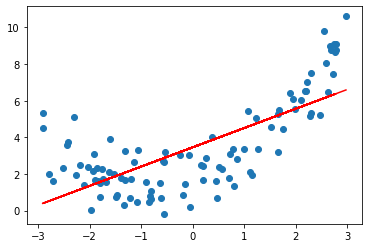

In [8]:
plt.scatter(x, Y)
plt.plot(x, y_predict, color='r')
plt.show()

## 解决方案，添加一个特征

In [9]:
(X**2).shape

(100, 1)

In [10]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, Y)
y_predict2 = lin_reg2.predict(X2)

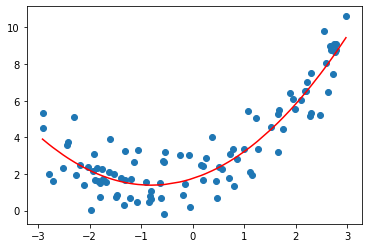

In [16]:
plt.scatter(x, Y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [17]:
lin_reg2.coef_

array([0.90697548, 0.56529711])

In [18]:
lin_reg2.intercept_

1.7503934222241642

## scikit-learn中的多项式回归Pipeline

In [19]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
Y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [22]:
X2.shape

(100, 3)

In [23]:
X2[:5, :]

array([[1.        , 1.24275882, 1.54444948],
       [1.        , 2.64371422, 6.98922489],
       [1.        , 2.38396736, 5.68330039],
       [1.        , 0.4929335 , 0.24298343],
       [1.        , 0.7851357 , 0.61643806]])

In [25]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, Y)
y_predict2 = lin_reg2.predict(X2)

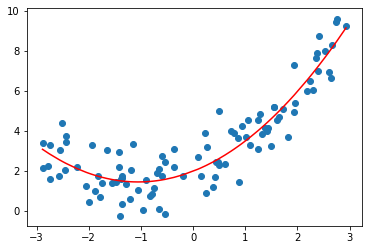

In [26]:
plt.scatter(x, Y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [28]:
lin_reg2.coef_

array([0.        , 1.01981295, 0.48462086])

In [29]:
lin_reg2.intercept_

1.9967601704647402

## 关于PolynomialFeatures

In [30]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [31]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [32]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [34]:
X2.shape

(5, 6)

In [35]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [37]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [38]:
X3.shape

(5, 10)

In [39]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipeline

In [40]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
Y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg= Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [42]:
poly_reg.fit(X, Y)
Y_predict = poly_reg.predict(X)

In [44]:
Y_predict.shape

(100,)

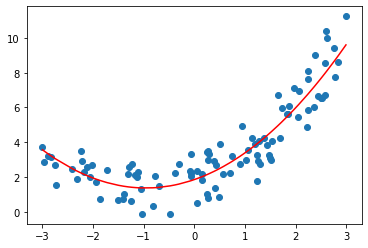

In [46]:
plt.scatter(x, Y)
plt.plot(np.sort(x), Y_predict[np.argsort(x)], color='r')
plt.show()